In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as ps
pd.set_option('display.float_format',lambda x: '%.3f' % x)
from collections import Counter
from matplotlib.pyplot import figure
from datetime import datetime

In [3]:
#Importing Orders dataframe 
Orders = pd.read_csv('orders.csv',sep= ';')
Orders['OrderDate'] =  pd.to_datetime(Orders['OrderDate'], format='%Y-%m-%d')
Orders.head()

,PlayerID,OrderID,OrderDate,Price
0,77,670,2019-11-01,"207,35"
1,126,554,2019-11-01,"43,71"
2,126,555,2019-11-01,"28,23"
3,196,337,2019-11-01,"54,96"
4,273,425,2019-11-01,"48,57"


In [4]:
#Importing Logins dataframe 
Logins = pd.read_csv('logins.csv',sep= ';')
Logins['LoginDate'] =  pd.to_datetime(Logins['LoginDate'], format='%Y-%m-%d')
Logins.tail(10)

,PlayerID,LoginDate
4096846,195519,2020-02-25
4096847,195519,2020-02-26
4096848,195519,2020-02-27
4096849,195519,2020-02-28
4096850,195519,2020-02-29
4096851,195519,2020-03-01
4096852,195519,2020-03-02
4096853,195520,2020-03-01
4096854,195520,2020-03-02
4096855,195521,2020-01-03


In [5]:
#Adding days and weeks to calculate the basic statistics like number of players come online each week, month, etc.
Logins['year'] = pd.DatetimeIndex(Logins['LoginDate']).year
Logins['month'] = pd.DatetimeIndex(Logins['LoginDate']).month
Logins['day'] = pd.DatetimeIndex(Logins['LoginDate']).day
Logins['Week_Number'] = pd.DatetimeIndex(Logins['LoginDate']).week
Logins['year'] = Logins['year'].apply(str)
Logins['month'] = Logins['month'].apply(str)
Logins['day'] = Logins['day'].apply(str)
Logins['Week_Number'] = Logins['Week_Number'].apply(str)
Logins['Week_Number'] = Logins['Week_Number'] + '-' + Logins['year']
Logins['year_month'] = Logins['year'] + '-' + Logins['month']


## Basic Statistics such as number of players come online each day/week/month

In [6]:
#Number of players per week
dict_week_pid = {}
for index,row in Logins.iterrows():
    
    str_week = str(row['Week_Number'])
    str_pid = str(row['PlayerID'])
    set_Temp_week=dict_week_pid.get(str_week, set())
    set_Temp_week.add(str_pid)
    dict_week_pid[str_week] = set_Temp_week
#Number of players per day
dict_date_pid = {}
for index,row in Logins.iterrows():
    
    str_date = str(row['LoginDate'])
    str_pid = str(row['PlayerID'])
    set_temp_day=dict_date_pid.get(str_date, set())
    set_temp_day.add(str_pid)
    dict_date_pid[str_date] = set_temp_day
#Number of players per month
dict_month_pid = {}
for index,row in Logins.iterrows():
    
    str_month = str(row['year_month'])
    str_pid_month = str(row['PlayerID'])
    set_temp_month=dict_month_pid.get(str_month, set())
    set_temp_month.add(str_pid_month)
    dict_month_pid[str_month] = set_temp_month
#getting the number of players per month
dict_month_count_pid = {}
for key,value in dict_month_pid.items():
    dict_month_count_pid[key] = len(value)
#getting the number of players per day
dict_day_count_pid = {}
for key,value in dict_date_pid.items():
    dict_day_count_pid[key] = len(value)
#getting the number of players per week.
dict_week_count_pid = {}
for key,value in dict_week_pid.items():
    dict_week_count_pid[key] = len(value)

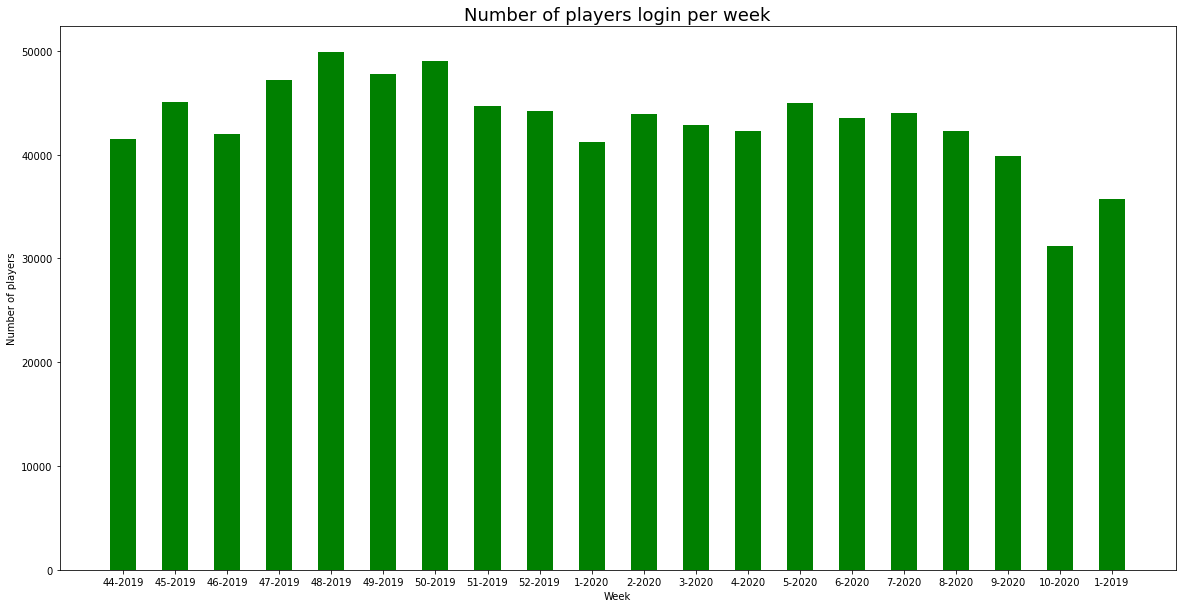

In [24]:
#Plotting number of players come online per week.
figure(figsize=(20, 10))
width = .5 
plt.title("Number of players login per week",size=18)
plt.bar(dict_week_count_pid.keys(), dict_week_count_pid.values(), width, color='g')
plt.xlabel("Week")
plt.ylabel("Number of players")
plt.savefig('Number of players login per week.png',bbox_inches='tight', dpi=100)
plt.show()


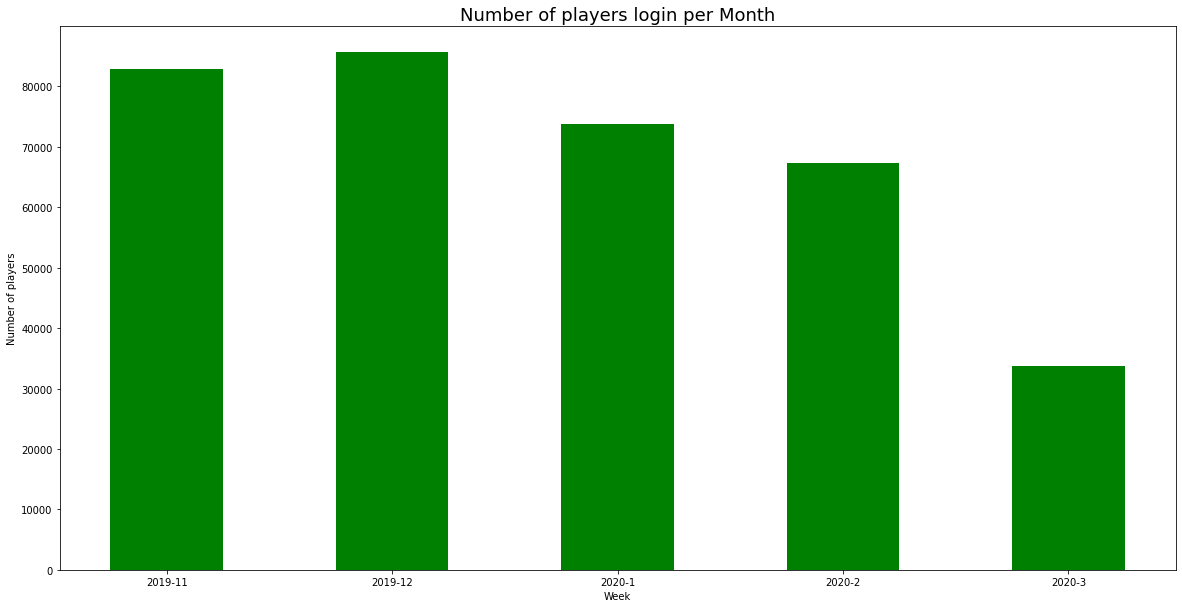

In [25]:
#Plotting number of players come online per month.
figure(figsize=(20, 10))
width = .5 
plt.title("Number of players login per Month",size=18)
plt.bar(dict_month_count_pid.keys(), dict_month_count_pid.values(), width, color='g')
plt.xlabel("Week")
plt.ylabel("Number of players")
plt.savefig('Number of players login per month.png',bbox_inches='tight', dpi=100)
plt.show()

## Task 1 - Effect of flash sale on revenue

In [9]:
#Total number of orders for a whole period
Orders['OrderID'].nunique()

105413

In [10]:
#Adding days and weeks to calculate the basic statistics like number of orders each week, month, etc.
Orders['Price'] = Orders['Price'].str.replace(',','.')
Orders['Price'] = Orders['Price'].astype(float)
Orders['year'] = pd.DatetimeIndex(Orders['OrderDate']).year
Orders['month'] = pd.DatetimeIndex(Orders['OrderDate']).month
Orders['Week_Number'] = pd.DatetimeIndex(Orders['OrderDate']).week
Orders['year'] = Orders['year'].apply(str)
Orders['month'] = Orders['month'].apply(str)
Orders['Week_Number'] = Orders['Week_Number'].apply(str)
Orders['Week_Number'] = Orders['Week_Number'] + '-' + Orders['year']
Orders['year_month'] = Orders['year'] + '-' + Orders['month']

# Grouping orders according to date and each month
Orders_monthly = Orders.groupby(['OrderDate'])['Price'].sum()
Orders_monthly2 = Orders.groupby(['year_month'])['Price'].sum()
Orders_monthly = Orders_monthly.reset_index()
Orders_monthly2 = Orders_monthly2.reset_index()
Orders_monthly2.head()
Orders_monthly2['Price'] = Orders_monthly2['Price'].round(decimals =2)

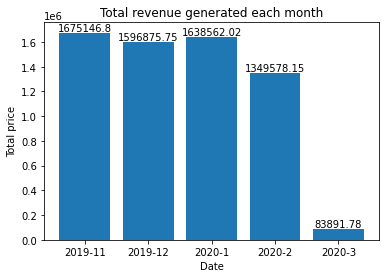

In [26]:
#Plotting number of revenue generated each month.
plt.bar(Orders_monthly2['year_month'],Orders_monthly2['Price'])
plt.title("Total revenue generated each month",size=12)
plt.xlabel("Date")
plt.ylabel("Total price")
for i in range(len(Orders_monthly2['year_month'])):
        plt.text(i,Orders_monthly2['Price'][i],Orders_monthly2['Price'][i],ha='center', va='bottom')
plt.savefig('Total revenue per month.png',bbox_inches='tight', dpi=100)
plt.show()

In [32]:
# Plotting the revenue generated and players logged in for a whole time for each day and marked the flash sales in colors. 
day = pd.DataFrame(dict_day_count_pid.items())
day[0] =  pd.to_datetime(day[0], format='%Y-%m-%d')
fig = ps.line(Orders_monthly, x='OrderDate', y='Price',
    width=1200,
    height=500)
fig.update_traces(mode='markers + lines')
fig.add_scatter(x=day[0], y=day[1], mode = 'markers',marker=dict(size=4, color="Purple"))

fig.add_vrect(
    x0="2019-12-21", x1="2019-12-24",annotation_text="First flash sale",
    fillcolor="LightSalmon", opacity=0.5,
    layer="below", line_width=0.5,
)
fig.add_vrect(
    x0="2020-01-28", x1="2020-01-30",annotation_text="Second flash sale",
    fillcolor="LightGreen", opacity=0.5,
    layer="below", line_width=0.5,)
fig.show()

In [13]:
#Seperating the dataframes as a time frame for flash sales and without flash sales to analyze the revenue profit. 
without_flash_sale1 = Orders_monthly.loc[(Orders_monthly['OrderDate'] >= '2019-11-01') & (Orders_monthly['OrderDate']  < '2019-12-21') ] 
without_flash_sale2 = Orders_monthly.loc[(Orders_monthly['OrderDate'] >= '2019-12-25') & (Orders_monthly['OrderDate']  < '2020-01-28') ]
without_flash_sale3 = Orders_monthly.loc[(Orders_monthly['OrderDate'] >= '2020-01-31') & (Orders_monthly['OrderDate']  <= '2020-03-02') ]
without_flash_sale = pd.concat([without_flash_sale1 ,without_flash_sale2,without_flash_sale3])
avg = without_flash_sale.Price.mean()
avg = avg.astype(int)
with_flash_sale1 = Orders_monthly.loc[(Orders_monthly['OrderDate'] >= '2019-12-21') & (Orders_monthly['OrderDate']  < '2019-12-25') ]
with_flash_sale2 = Orders_monthly.loc[(Orders_monthly['OrderDate'] >= '2020-01-28') & (Orders_monthly['OrderDate']  < '2020-01-31') ]
with_flash_sale = pd.concat([with_flash_sale1 ,with_flash_sale2])
avg2 = with_flash_sale.Price.mean()
avg2 = avg2.astype(int)

In [14]:
#Plotting the revenue generated each day when no flash sale is running.
fig = ps.line(without_flash_sale, x='OrderDate', y='Price',
    width=1000,
    height=500)
fig.update_traces(mode='markers+lines')
fig.add_annotation(
    xref="x domain",
    yref="y domain",
    x=0.55,
    y=0.9,
    text="The Average Revenue per day without flash sale - {} ".format(avg),
    arrowhead=4,
)
fig.show()

In [15]:
#Plotting the revenue generated each day when flash sale is running.
fig = ps.line(with_flash_sale, x='OrderDate', y='Price',
    width=1000,
    height=500)
fig.update_traces(mode='markers')
fig.add_annotation(
    xref="x domain",
    yref="y domain",
    x=0.55,
    y=0.9,
    text="The Average Revenue per day with flash sale - {} ".format(avg2),
    arrowhead=4,
)

fig.show()

## Task 2 - The most successful flash sale 

In [16]:
# Assigning the first and second flash sales along with the diamonds bonus.
with_flash_sale['sale'] = 'Hi'
with_flash_sale['Diamonds'] = 1
date_string = '2020-01-28'
datetime = datetime.strptime(date_string, '%Y-%m-%d')
for index, row in with_flash_sale.iterrows():
    if row['OrderDate'] < datetime:
        with_flash_sale.at[index,'sale'] = 'First flash sale'
        with_flash_sale.at[index,'Diamonds'] = 35
    else:
        with_flash_sale.at[index,'sale'] = 'Second flash sale'
        with_flash_sale.at[index,'Diamonds'] = 50

In [17]:
best_sale = with_flash_sale.groupby(['sale','Diamonds'])['Price'].mean()
best_sale = best_sale.reset_index()
best_sale['Price'] = best_sale['Price'].round(decimals =2)
percent_price = ((best_sale['Price'][1] - best_sale['Price'][0]) / best_sale['Price'][0]) * 100
percent_price = percent_price.astype(int)
percent_diamond = ((best_sale['Diamonds'][1] - best_sale['Diamonds'][0]) / best_sale['Diamonds'][0]) * 100
percent_diamond = percent_diamond.astype(int)

In [18]:
#Plotting the Average revenues for both the flash sale and finding the better sale.
fig = ps.bar(best_sale, x="sale", y="Price" ,color = 'Diamonds',title="Average revenue for both flash sales",width = 600)
fig.update_traces(width=0.2)
fig.add_annotation(
    xref="x domain",
    yref="y domain",
    x=0.60,
    y=0.9,
    text="The Average Revenue growth is {}% and diamonds bonus increased is {}%".format(percent_price,percent_diamond),
    arrowhead=1,)
fig.show()